In [1]:
import pandas as pd

In [2]:
df=pd.read_excel("https://github.com/masterfloss/data/blob/main/socialmedia.xlsx?raw=true")

In [3]:
df.dtypes

Facebook    float64
Windows     float64
Android     float64
Linux       float64
Twitter     float64
Chrome      float64
dtype: object

In [4]:
import statsmodels.api as sm

In [5]:
X=df[['Linux','Chrome','Twitter']]
y=df[['Facebook']]


In [6]:
X = sm.add_constant(X)

In [7]:
result = sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Facebook   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     164.3
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           5.03e-45
Time:                        14:55:45   Log-Likelihood:                -449.30
No. Observations:                 140   AIC:                             906.6
Df Residuals:                     136   BIC:                             918.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.0780      2.861     18.904      0.000      48.421      59.735
Linux         23.1775      2.817      8.227      0.000      17.606      28.749
Chrome         0.3950      0.027     14.521      0.000       0.341       0.449
Twitter       -3.0289      0.205    -14.755      0.000      -3.435      -2.623
==============================================================================
Omnibus:                       34.871   Durbin-Watson:                   0.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.437
Skew:                          -1.049   Prob(JB):                     4.16e-17
Kurtosis:                       5.920   Cond. No.                         330.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

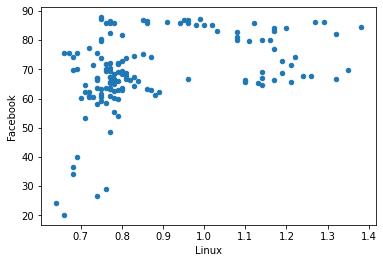

In [8]:
df.plot.scatter('Linux','Facebook')

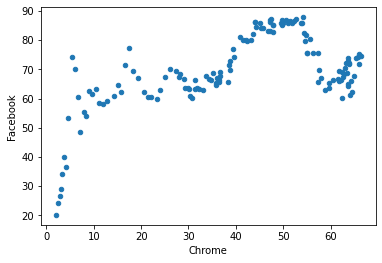

In [9]:
df.plot.scatter('Chrome','Facebook')

In [10]:
X=df[['Linux']]
y=df[['Facebook']]
result = sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Facebook   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              2892.
Date:                Tue, 08 Dec 2020   Prob (F-statistic):                    6.48e-95
Time:                        14:55:46   Log-Likelihood:                         -578.85
No. Observations:                 140   AIC:                                      1160.
Df Residuals:                     139   BIC:                                      1163.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Linux         76.9769      1.431     53.775      0.000      74.147      79.807
==============================================================================
Omnibus:                        6.564   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                6.786
Skew:                          -0.519   Prob(JB):                       0.0336
Kurtosis:                       2.706   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
X=df[['Linux','Chrome','Twitter']]
y=df[['Facebook']]

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
  
print(vif_data)

   feature       VIF
0    Linux  9.195029
1   Chrome  5.241991
2  Twitter  6.951483


In [13]:
len(X.columns)

3

In [14]:
X.corr()

,Linux,Chrome,Twitter
Linux,1.000000,0.153790,0.052919
Chrome,0.153790,1.000000,0.088151
Twitter,0.052919,0.088151,1.000000


In [15]:
XX=df[['Twitter']]**(1/2)
XX['Linux']=df[['Linux']]**(1/2)
XX['Chrome']=df[['Chrome']]**(1/2)

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = XX.columns 

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(XX.values, i) for i in range(len(XX.columns))] 
  
print(vif_data)

   feature        VIF
0  Twitter  26.187922
1    Linux  36.248031
2   Chrome  12.766491


In [17]:
XX = sm.add_constant(XX)
result = sm.OLS(y,XX).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Facebook   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     229.3
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           5.48e-53
Time:                        14:55:46   Log-Likelihood:                -430.39
No. Observations:                 140   AIC:                             868.8
Df Residuals:                     136   BIC:                             880.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.9816      5.006      9.785      0.000      39.082      58.881
Twitter      -16.2947      0.984    -16.561      0.000     -18.240     -14.349
Linux         39.0761      4.918      7.946      0.000      29.351      48.801
Chrome         4.3010      0.255     16.885      0.000       3.797       4.805
==============================================================================
Omnibus:                       25.959   Durbin-Watson:                   0.423
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.916
Skew:                          -0.872   Prob(JB):                     1.76e-10
Kurtosis:                       5.159   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""